In [1]:
# case study

Imagine you're McDonald’s, and you want to understand if different groups of consumers see your brand differently. This is important because it helps you know who to target with your marketing and what messages to send them.<br>

Here's what we'll do:<br>

    1. Data Collection: We have data collected from surveys that were originally done to see how people view brands. This data has been used before in different studies.

    2. Goal: Our goal is to figure out if there are specific groups of people who see McDonald’s differently from others.

Approach: We'll use a method called market segmentation analysis. This helps us divide people into groups based on their perceptions of McDonald’s.

Why It's Important: By understanding these groups, we can decide where to focus our efforts. For example, if there's a group with a positive view, we can make sure they keep liking us. If there's a group with a negative view, we can figure out why and try to change that.

# <font color="red">Step 1. </font>  Deciding to segement :-
it's a choice between a uniform marketing approach for all customers or recognizing and responding to the diversity in customers' perceptions.

# <font color="red">Step 2.</font>Specifying the Ideal Target Segment:- 

# <font color="red">Step 3 :- Collecting Data</font>

In [2]:
# Load necessary files
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [3]:
# Load mcdonalds dataset
mcdonalds=pd.read_csv("mcdonalds.csv")

# <font color="red"> Step 4 :- Exploring Data </font>

In [4]:
# Feactures names
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
# shape of Datasets
mcdonalds.shape

(1453, 15)

In [6]:
# print first 3 rows of data
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
# Replace 'yes' to 1 and 'no' to 0

In [8]:
md_x=mcdonalds.iloc[:,:11]

In [9]:
MD_x=md_x.replace(['Yes','No'],[1,0])

In [10]:
MD_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [11]:
# Getting the round off mean
np.round(MD_x.mean(), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

# <font color= 'red'> Insight:- </font> 
    1. Half of the respondents (55%) perceive McDonald’s as YUMMY.
    2. 91% believe that eating at McDonald’s is CONVENIENT.
    3. only 9% think that McDonald’s food is SPICY.
    4. McDonald's food to be convenient, fast, and sometimes indulgent or high in calories.
    5. Yummy, Greasy, Tasty, and Cheap :-These attributes have moderate mean scores, indicating that customers generally find McDonald's food to be enjoyable (yummy, tasty) and affordable (cheap).
    

In [12]:
MD_pca=PCA()

In [13]:
MD_pca.fit(MD_x)

PCA()

In [14]:
proportion_of_variance=MD_pca.explained_variance_ratio_

In [15]:
cum=np.cumsum(MD_pca.explained_variance_ratio_)

In [16]:
Standard_deviation=MD_pca.explained_variance_ **0.5

In [17]:
col=MD_x.columns
col

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [18]:
pd.DataFrame({"Standard deviation":Standard_deviation,
    "proportion_of_variance":proportion_of_variance,
         "Cumulative Proportion": cum
},index=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"]).transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
proportion_of_variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


# <font color="red">Insight :- </font> PC1 and PC2 contain 50% of information.

In [19]:
# standard deviation with 1 decimal place value
np.round(Standard_deviation,1)

array([0.8, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2])

In [20]:
MD_pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [21]:
pc=pd.DataFrame(MD_pca.components_,columns=col,index=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"]).transpose()
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


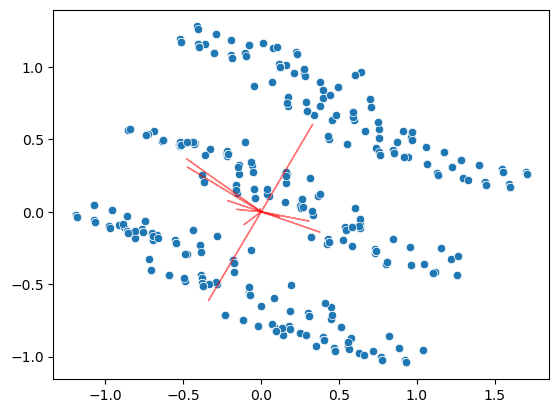

In [22]:
sns.scatterplot(x=MD_pca.transform(MD_x)[:,0],y=MD_pca.transform(MD_x)[:,1])
principal_axes = MD_pca.components_[:11]

# Plot the principal axes
for i, variable in enumerate(MD_x.columns):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i], color='r', alpha=0.5)


In [23]:
MD_pca.components_[0]

array([-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
       -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
        0.37475293])

In [24]:
MD_pca.components_[1]

array([ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
       -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
       -0.13965633])

In [25]:
MD_pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

# <font color="red"> Step 5: Extracting Segments </font>

In [26]:
from sklearn.cluster import KMeans

In [27]:
np.random.seed(1234)

# We try to find number of clusters which gives best result :-

In [28]:

wcss=[]
centroid=[]
for k in range(1,9):
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)
    centroid.append(kmeans.cluster_centers_)
    

In [29]:
kmeans.inertia_

1182.100018613879

In [30]:
wcss

[2779.040605643496,
 2145.5037269171585,
 1818.7176591653865,
 1604.107291540792,
 1434.6104173514595,
 1331.6524400071678,
 1248.4178870553144,
 1182.100018613879]

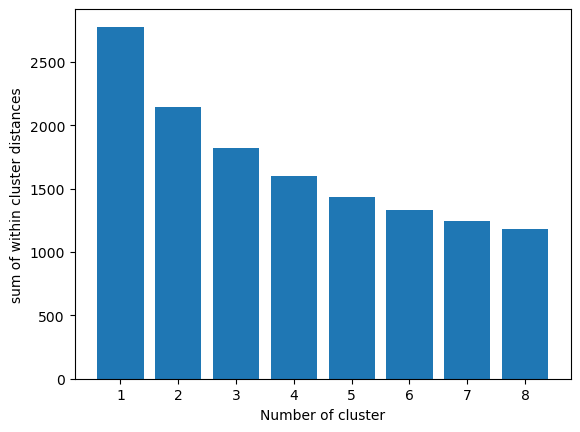

In [31]:
plt.bar(x=range(1,9),height=wcss)
plt.xlabel("Number of cluster")
plt.ylabel("sum of within cluster distances")
plt.show()

# we do this as given in the code but in pandas we also use elbow method to find number of cluster which give good result. 

In [32]:
len(wcss)

8

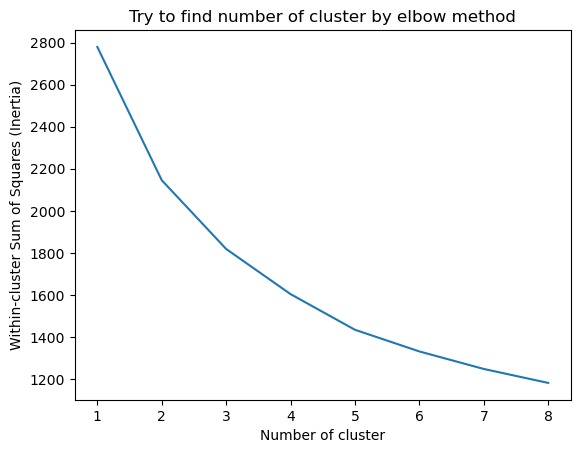

In [33]:
sns.lineplot(x=range(1,9),y=wcss)
plt.title("Try to find number of cluster by elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("Within-cluster Sum of Squares (Inertia)")
plt.show()

In [34]:
# insight :- we saw a little bit sharpness at Number of cluster = 5 , so we take number of cluster = 5 for kmean modeling

In [35]:
Optimal_cluster=5

In [36]:
# we can also find optimal cluster by using Silhouette_score

In [37]:
silhouette_scores=[]
kmeans_list=[]
for i in range(2,9):
    kmeans1=KMeans(n_clusters=i,n_init=10,random_state=1234)
    labels=kmeans1.fit_predict(MD_x)
    silhouette_scores.append(silhouette_score(MD_x,labels))
    kmeans_list.append(kmeans1)

In [38]:
# kmeans_list

In [39]:
silhouette_scores

[0.24441701827275675,
 0.23915373940875356,
 0.256821716312148,
 0.2612871730877041,
 0.2716093535523477,
 0.2795180738626384,
 0.28648799619628673]

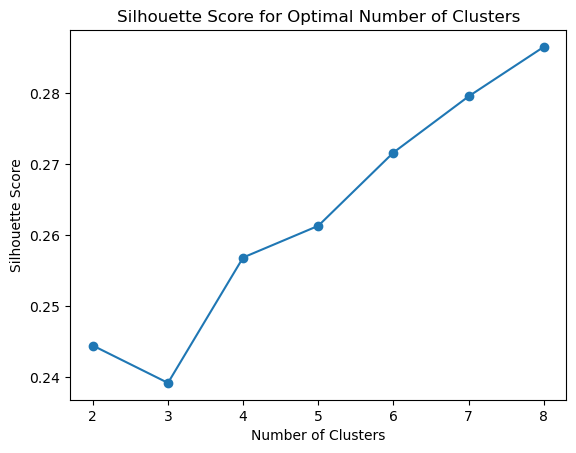

In [40]:
plt.plot(range(2,9), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [41]:
cluster_range=range(2,9)
from sklearn.utils import resample

In [42]:
# PERFORMING K-MEANS CLUSTERING

In [43]:
kmeans=KMeans(n_clusters=5,random_state=1234)
MD_kmeans=kmeans.fit(MD_x)

In [44]:
# plotting kmeans result

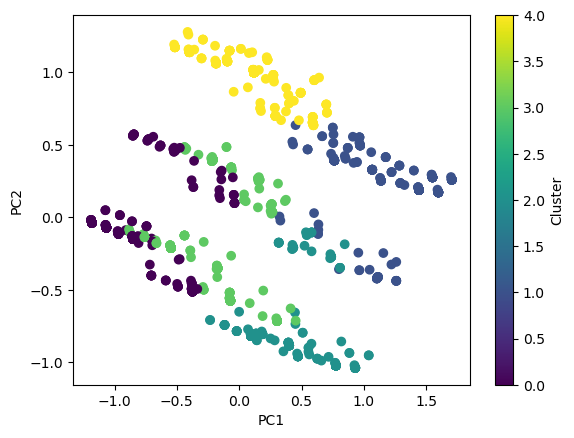

In [45]:
plt.scatter(MD_pca.transform(MD_x)[:,0],MD_pca.transform(MD_x)[:,1],c=MD_kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [46]:
# Performing bootstrapped K-means clustering:

# Global stability 

In [47]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    labels = kmeans.fit_predict(data)
    return labels

In [48]:
# comparing the labels by using adjusted_rand_score
def calculate_adjusted_rand_index(labels_true, labels_pred):
    return adjusted_rand_score(labels_true, labels_pred)

In [49]:
# calculating the stability score
def compute_global_stability(data, n_clusters, n_bootstraps):
    stability_scores = []
    n_samples = data.shape[0]
    
    for _ in range(n_bootstraps):
        # Generate a bootstrap sample
        data_boot = resample(data, replace=True, n_samples=n_samples, random_state=None)
        
        # Perform k-means clustering on the bootstrap sample
        labels_boot = kmeans_clustering(data_boot, n_clusters)
        
        # Calculate adjusted Rand index between original labels and bootstrap labels
        ARI = calculate_adjusted_rand_index(labels_true, labels_boot)
        stability_scores.append(ARI)
    
    return stability_scores

In [50]:
data=MD_x
labels_true=MD_kmeans.labels_
n_clusters_range=range(2,9)
n_bootstraps=100

In [51]:
# Compute stability scores for each number of clusters
global_stability = {}
for n_clusters in n_clusters_range:
    stability_scores = compute_global_stability(data, n_clusters, n_bootstraps)
    global_stability[n_clusters] = stability_scores


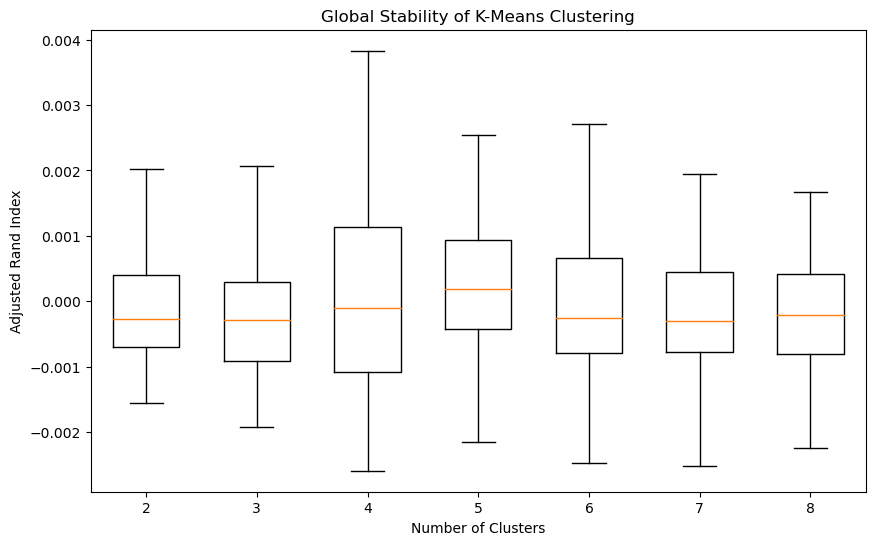

In [52]:
# Visualize global stability scores
plt.figure(figsize=(10, 6))
for n_clusters, stability_scores in global_stability.items():
    plt.boxplot(stability_scores, positions=[n_clusters], widths=0.6, showfliers=False)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of K-Means Clustering')
plt.xticks(list(global_stability.keys()))
plt.show()

Text(0.5, 1.0, 'Histogram of Cluster Memberships')

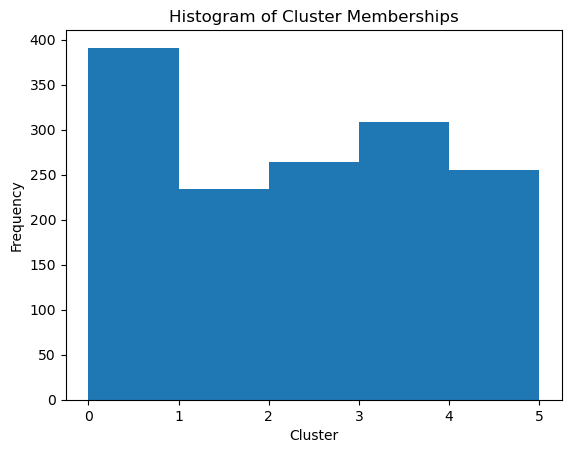

In [53]:
cluster_labels = MD_kmeans.labels_

# Assuming MD.x is the data used for clustering
data = MD_x

# Create histogram
plt.hist(cluster_labels, bins=len(set(cluster_labels)), range=(0, len(set(cluster_labels))), align='mid')

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Memberships')

# Segment Level Stability Analysis

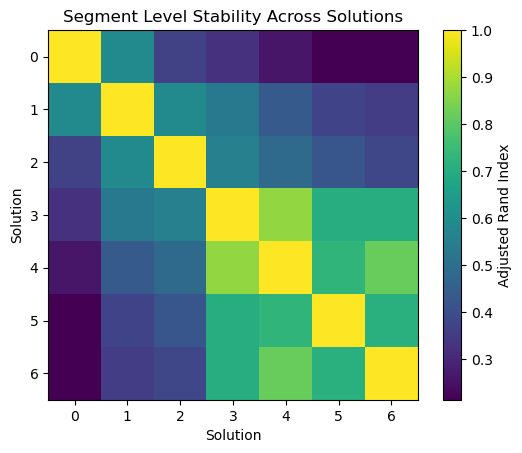

In [54]:

from sklearn.metrics import adjusted_rand_score

# Calculate adjusted Rand index between each pair of clustering results
n_solutions = len(kmeans_list)
rand_indices = np.zeros((n_solutions, n_solutions))
for i in range(n_solutions):
    for j in range(n_solutions):
        rand_indices[i, j] = adjusted_rand_score(kmeans_list[i].labels_, kmeans_list[j].labels_)

# Plot the heatmap of adjusted Rand indices
plt.imshow(rand_indices, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Adjusted Rand Index')
plt.xlabel('Solution')
plt.ylabel('Solution')
plt.title('Segment Level Stability Across Solutions')
plt.show()

# Using Mixtures of Distributions

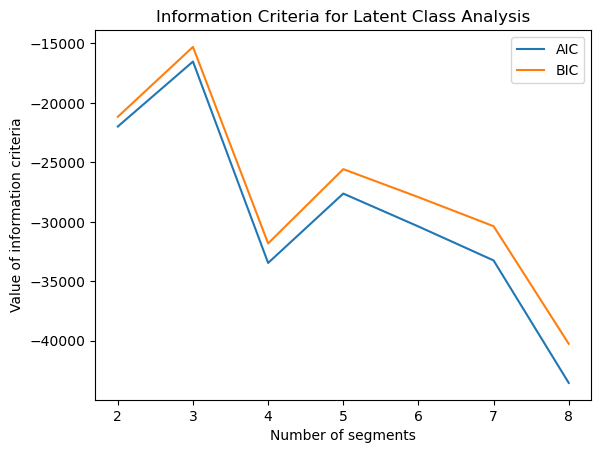

mixture    0    1    2    3    4
kmeans                          
0         27    0    5    1  138
1          0  230   40    0    0
2          0    0   43  246    0
3         12   96   15    3    0
4          0    0  134    0    4
5        218    0    0    0    0
6          0    1  126    5    6
7         39    5   33    0   26
mixture   0    1   2    3
kmeans                   
0        77    0   4   90
1         9  261   0    0
2         7    0   2  280
3         9  116   1    0
4         1   58   9   70
5        12   83   0  123
6         3    0  46   89
7        11   80  12    0
Log Likelihood with initialization: 11.727872558164462
Log Likelihood of best model: 9.773972053233146


In [55]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Assuming MD_x is the binarized data matrix
# Assuming MD_k4 contains cluster labels for the four-segment k-means solution

# Perform latent class analysis with a finite mixture of binary distributions
n_components_range = range(2, 9)
models = []
for n_components in n_components_range:
    model = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
    model.fit(MD_x)
    models.append(model)

# Plot information criteria to choose the number of segments
AIC_values = [model.aic(MD_x) for model in models]
BIC_values = [model.bic(MD_x) for model in models]
plt.plot(n_components_range, AIC_values, label='AIC')
plt.plot(n_components_range, BIC_values, label='BIC')
plt.xlabel('Number of segments')
plt.ylabel('Value of information criteria')
plt.title('Information Criteria for Latent Class Analysis')
plt.legend()
plt.show()

# Compare latent class analysis with k-means clustering
kmeans_labels = labels
best_model = models[3]  # Choosing the model with four components (segments)
latent_class_labels = best_model.predict(MD_x)
table = pd.crosstab(index=kmeans_labels, columns=latent_class_labels, rownames=['kmeans'], colnames=['mixture'])
print(table)

# Initialize mixture model using k-means solution
init_labels = kmeans_labels
model_with_init = GaussianMixture(n_components=4, covariance_type='full', random_state=1234, init_params='kmeans', n_init=1)
model_with_init.fit(MD_x)

# Compare initialized mixture model with k-means solution
latent_class_labels_with_init = model_with_init.predict(MD_x)
table_with_init = pd.crosstab(index=kmeans_labels, columns=latent_class_labels_with_init, rownames=['kmeans'], colnames=['mixture'])
print(table_with_init)

# Compare log-likelihood values
log_likelihood_with_init = model_with_init.score(MD_x)
log_likelihood_best_model = best_model.score(MD_x)
print("Log Likelihood with initialization:", log_likelihood_with_init)
print("Log Likelihood of best model:", log_likelihood_best_model)

#  finite mixtures of linear regression models 

In [56]:
mcdonalds['Like'].replace(['I love it!+5','I hate it!-5'],['5','-5'],inplace=True)

In [59]:
from scipy.cluster import hierarchy as shc

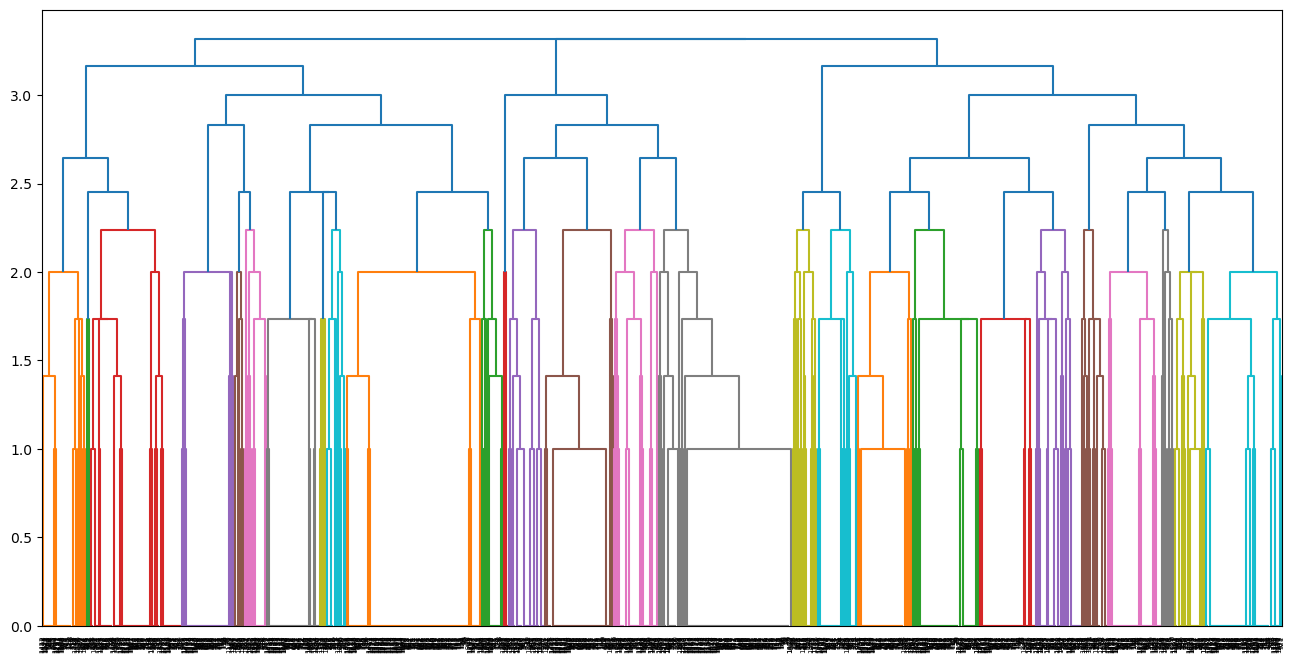

In [65]:
plt.figure(figsize=(16,8))
shc.dendrogram(shc.linkage(MD_x,method="complete"))
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
alg=AgglomerativeClustering(n_clusters=5,linkage ='complete')

In [71]:
Agg_labels=alg.fit_predict(MD_x)

In [58]:
--break

SyntaxError: invalid syntax (2613166702.py, line 1)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Hierarchical Clustering
MD_vclust = linkage(MD_x.T, method='complete')  # Assuming MD_x contains the data

# Step 2: Create Segment Profile Plot
segment_order = MD_vclust[:, 3]
barchart_order = np.argsort(segment_order)

# Generate some example data
# Replace this with your actual data
MD_k4 = pd.DataFrame(np.random.rand(4, 10), columns=['perception1', 'perception2', 'perception3', 'perception4', 'perception5', 'perception6', 'perception7', 'perception8', 'perception9', 'perception10'])

# Create the segment profile plot
plt.figure(figsize=(10, 6))
sns.barplot(data=kmeans.inertia_, order=barchart_order)
plt.xlabel("Segment")
plt.ylabel("Percentage")
plt.title("Segment Profile Plot")
plt.show()

# Step 3: Segment Separation Plot using PCA
# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Plot segment separation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=kmeans_5.labels_, palette="Set1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Segment Separation Plot")
plt.legend(title="Segment")
plt.show()

ValueError: Input data must be a pandas object to reorder

<Figure size 1000x600 with 0 Axes>

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=1234)
MD_kmeans=kmeans.fit(MD_x)

In [78]:
kmeans_list

[KMeans(n_clusters=2, n_init=10, random_state=1234),
 KMeans(n_clusters=3, n_init=10, random_state=1234),
 KMeans(n_clusters=4, n_init=10, random_state=1234),
 KMeans(n_clusters=5, n_init=10, random_state=1234),
 KMeans(n_clusters=6, n_init=10, random_state=1234),
 KMeans(n_clusters=7, n_init=10, random_state=1234),
 KMeans(n_init=10, random_state=1234)]